In [99]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [63]:
# Mount Google Drive
drive.mount('/content/mount')

Drive already mounted at /content/mount; to attempt to forcibly remount, call drive.mount("/content/mount", force_remount=True).


In [64]:
# Loading the data from csv file to a pandas dataframe
df = pd.read_csv("/content/mount/MyDrive/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [66]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [67]:
np.random.seed(42)
data = {
    'PurchaseAmount': np.random.rand(100) * 1000,
    'Frequency': np.random.randint(1, 11, 100),  }

In [68]:
df = pd.DataFrame(data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [104]:
k = 3
kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10)
df['Cluster'] = kmeans.fit_predict(scaled_data)

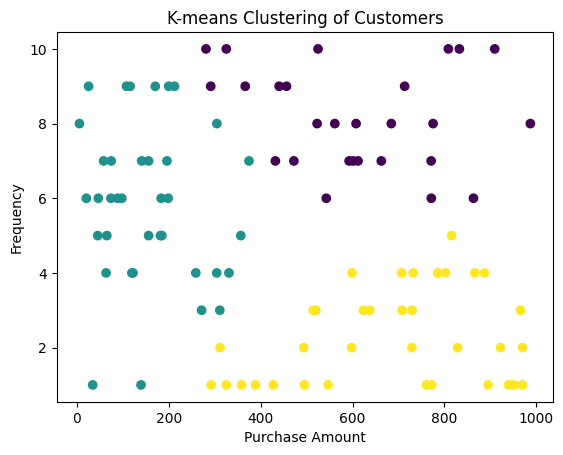

In [70]:
plt.scatter(df['PurchaseAmount'], df['Frequency'], c=df['Cluster'], cmap='viridis')
plt.title('K-means Clustering of Customers')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

In [72]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

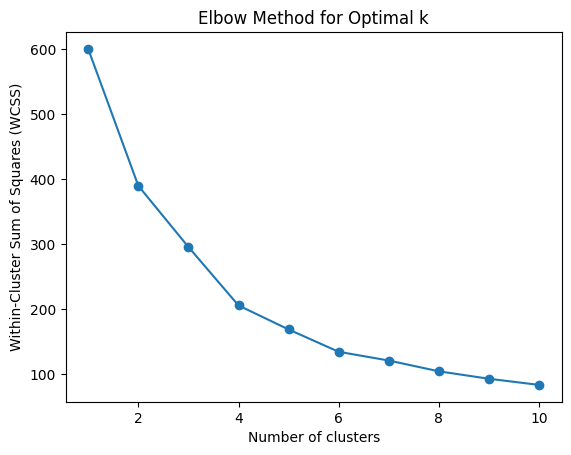

In [105]:
# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [81]:
# Let's assume the optimal number of clusters is 3
optimal_k = 3

# Applying KMeans with the optimal number of clusters and explicitly set n_init
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)

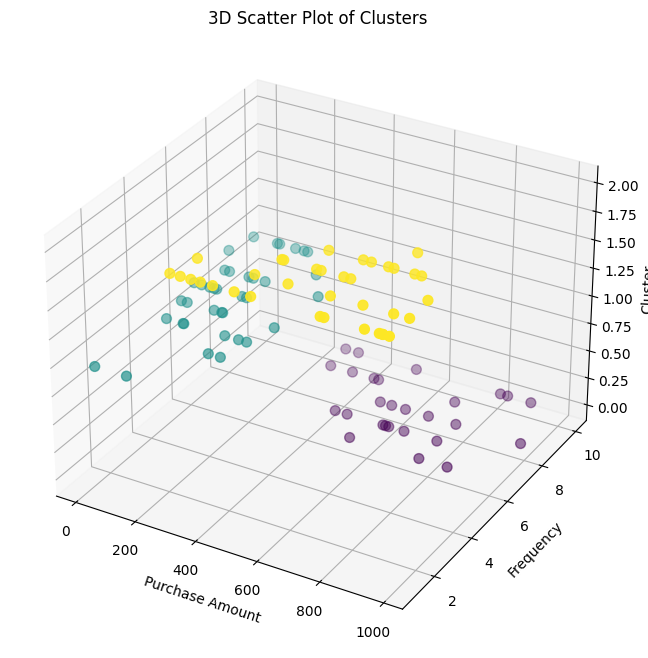

In [106]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['PurchaseAmount'], df['Frequency'], df['Cluster'], c=df['Cluster'], cmap='viridis', s=50)
ax.set_title('3D Scatter Plot of Clusters')
ax.set_xlabel('Purchase Amount')
ax.set_ylabel('Frequency')
ax.set_zlabel('Cluster')
plt.show()

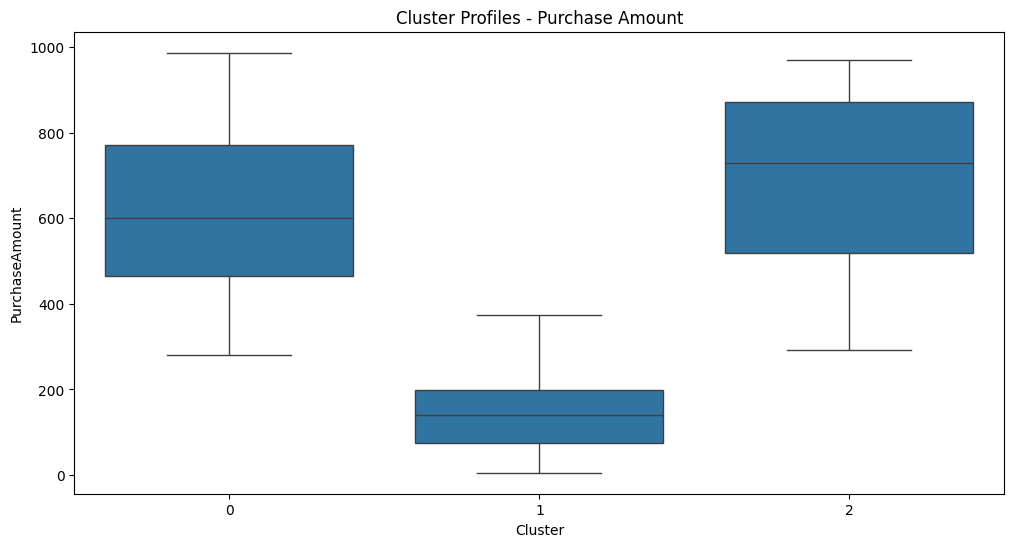

In [107]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='PurchaseAmount', data=df)
plt.title('Cluster Profiles - Purchase Amount')
plt.show()

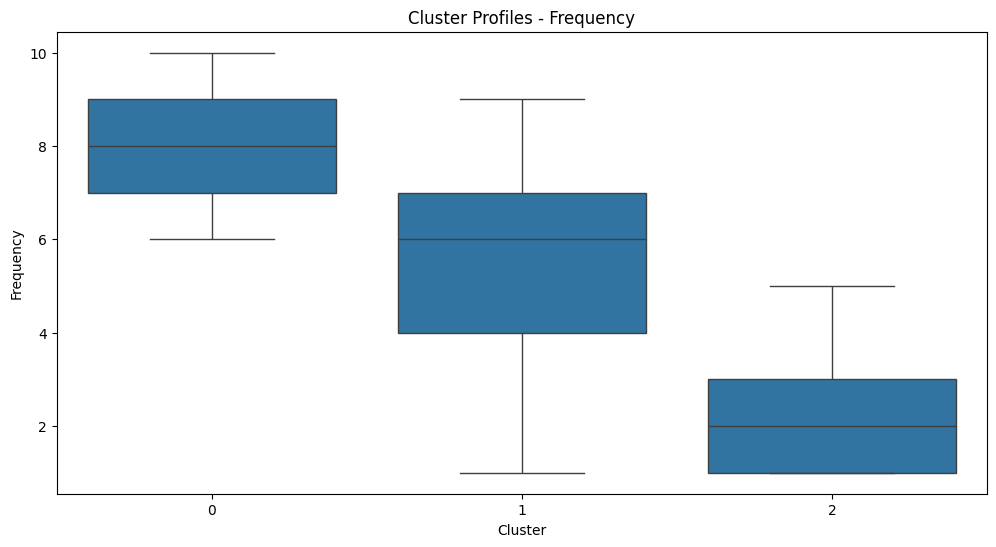

In [101]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Frequency', data=df)
plt.title('Cluster Profiles - Frequency')
plt.show()

In [108]:
# Summary statistics for each cluster
df.groupby('Cluster').mean()

,PurchaseAmount,Frequency
Cluster,,
0,607.629715,8.148148
1,156.658053,5.837838
2,689.325669,2.277778
